## diabetes prediction

In [155]:
from sklearn.datasets import load_diabetes


In [156]:
dataset=load_diabetes()

In [157]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [158]:
import pandas as pd
df_diabetes=pd.DataFrame(dataset.data,columns=['age',
                                               'sex',
                                               'bmi',
                                               'bp',
                                               's1',
                                               's2',
                                               's3',
                                               's4',
                                               's5',
                                               's6'])
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [159]:
## indepemdent and dependent features
X=df_diabetes
y=dataset['target']

In [160]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [161]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
249,-0.012780,-0.044642,0.060618,0.052858,0.047965,0.029375,-0.017629,0.034309,0.070207,0.007207
389,-0.005515,0.050680,0.001339,-0.084856,-0.011201,-0.016658,0.048640,-0.039493,-0.041176,-0.088062
121,0.063504,-0.044642,0.017506,0.021872,0.008063,0.021546,-0.036038,0.034309,0.019907,0.011349
195,0.027178,0.050680,0.025051,0.014987,0.025950,0.048477,-0.039719,0.034309,0.007838,0.023775
69,0.016281,-0.044642,-0.046085,-0.005670,-0.075870,-0.061438,-0.013948,-0.039493,-0.051404,0.019633


In [162]:
## correlation
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.197408,0.198359,0.394903,0.238375,0.192920,-0.128403,0.227110,0.314151,0.351570
sex,0.197408,1.000000,0.108261,0.221914,0.057674,0.180315,-0.379464,0.324882,0.150956,0.193322
bmi,0.198359,0.108261,1.000000,0.356324,0.226047,0.248146,-0.395021,0.412826,0.435505,0.358273
bp,0.394903,0.221914,0.356324,1.000000,0.238295,0.165632,-0.192505,0.249141,0.420236,0.368882
s1,0.238375,0.057674,0.226047,0.238295,1.000000,0.872781,0.006313,0.559626,0.566312,0.356280
s2,0.192920,0.180315,0.248146,0.165632,0.872781,1.000000,-0.265114,0.684840,0.325759,0.315890
s3,-0.128403,-0.379464,-0.395021,-0.192505,0.006313,-0.265114,1.000000,-0.754616,-0.370523,-0.297055
s4,0.227110,0.324882,0.412826,0.249141,0.559626,0.684840,-0.754616,1.000000,0.609983,0.436311
s5,0.314151,0.150956,0.435505,0.420236,0.566312,0.325759,-0.370523,0.609983,1.000000,0.490970
s6,0.351570,0.193322,0.358273,0.368882,0.356280,0.315890,-0.297055,0.436311,0.490970,1.000000


<Axes: >

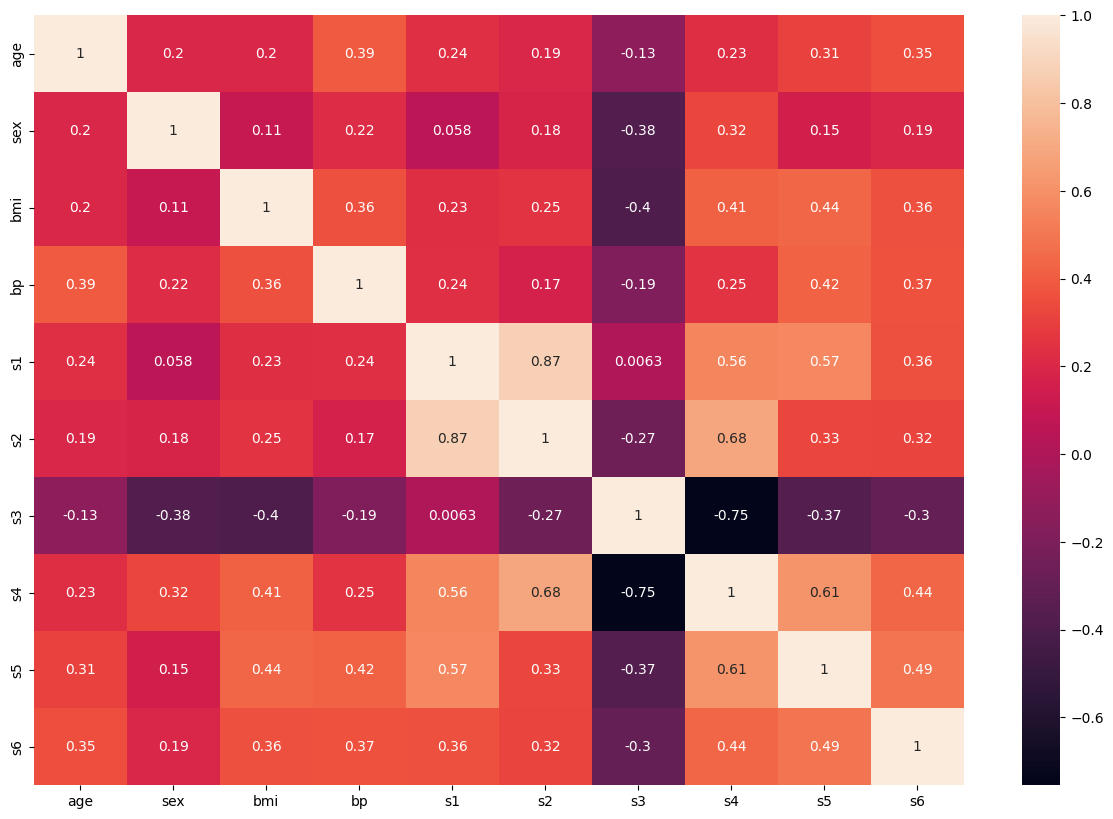

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot=True)

In [164]:
from sklearn.tree import DecisionTreeClassifier
regressor=DecisionTreeClassifier()
regressor.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## hyperpararameter tuning

In [165]:
param={
    'criterion':['squared_error','friedman_mse','absolute_error'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['sqrt','log2',None]
}

In [166]:
param

{'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
 'splitter': ['best', 'random'],
 'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
 'max_features': ['sqrt', 'log2', None]}

In [167]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor


In [168]:
regressor=DecisionTreeRegressor()

In [169]:
grid= GridSearchCV(regressor,param_grid=param,cv=5,scoring='neg_mean_squared_error')

In [170]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

,estimator,DecisionTreeRegressor()
,param_grid,"{'criterion': ['squared_error', 'friedman_mse', ...], 'max_depth': [1, 2, ...], 'max_features': ['sqrt', 'log2', ...], 'splitter': ['best', 'random']}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [171]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': None,
 'splitter': 'random'}

In [172]:
y_pred=grid.predict(X_test)

In [173]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [174]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.3107510186942133
54.03816026552868
4361.340856288058


In [183]:
selectmodel=DecisionTreeRegressor(criterion='friedman_mse',max_depth=4,max_features='log2',splitter='best')

[Text(0.5, 0.9, 'x[2] <= -0.006\nsquared_error = 5757.456\nsamples = 309\nvalue = 152.738'),
 Text(0.25, 0.7, 'x[8] <= 0.02\nsquared_error = 3284.076\nsamples = 157\nvalue = 119.013'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[2] <= -0.026\nsquared_error = 2653.839\nsamples = 131\nvalue = 108.618'),
 Text(0.0625, 0.3, 'x[7] <= 0.021\nsquared_error = 1794.111\nsamples = 80\nvalue = 97.962'),
 Text(0.03125, 0.1, 'squared_error = 1542.954\nsamples = 74\nvalue = 93.73'),
 Text(0.09375, 0.1, 'squared_error = 1945.472\nsamples = 6\nvalue = 150.167'),
 Text(0.1875, 0.3, 'x[3] <= 0.095\nsquared_error = 3544.928\nsamples = 51\nvalue = 125.333'),
 Text(0.15625, 0.1, 'squared_error = 3448.13\nsamples = 50\nvalue = 123.52'),
 Text(0.21875, 0.1, 'squared_error = 0.0\nsamples = 1\nvalue = 216.0'),
 Text(0.375, 0.5, 'x[9] <= 0.04\nsquared_error = 3172.314\nsamples = 26\nvalue = 171.385'),
 Text(0.3125, 0.3, 'x[7] <= 0.001\nsquared_error = 2448.84\nsamples = 18\nvalue = 155.222'),
 Text(0.2812

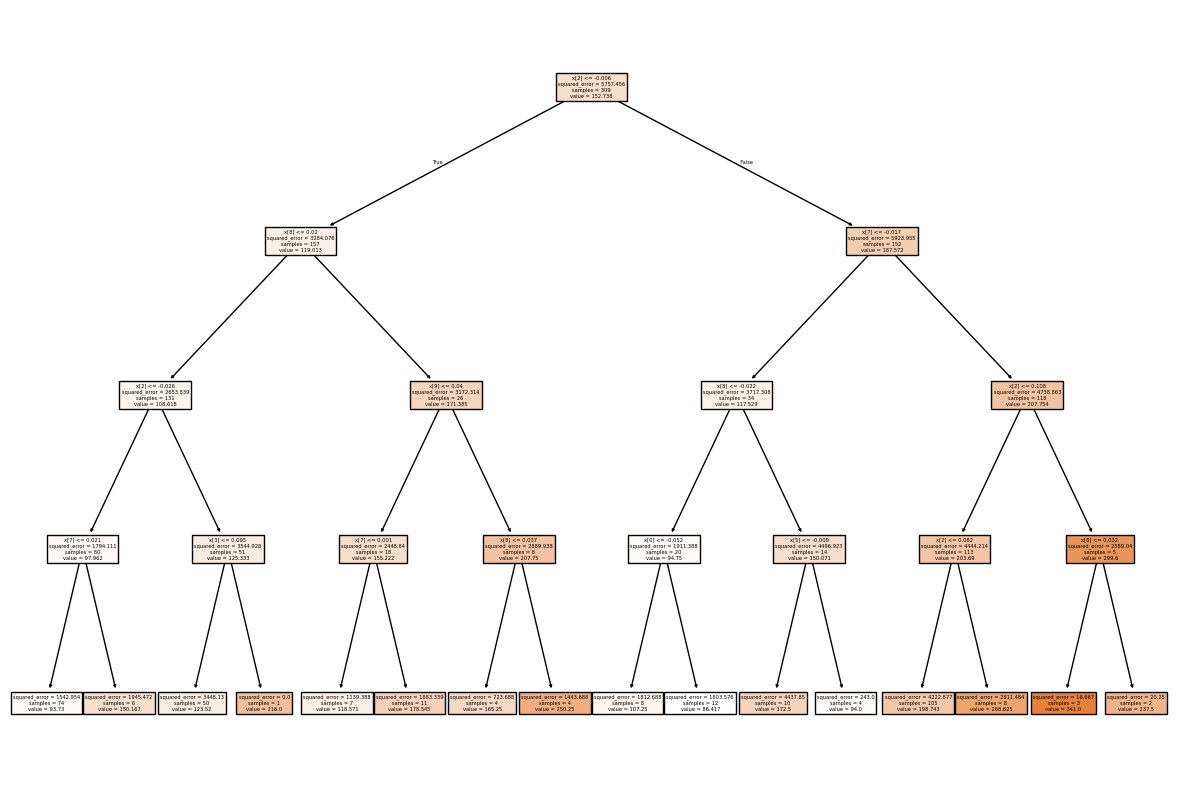

In [187]:
##visualize the decision tree
import matplotlib.pyplot as plt
from sklearn import tree

selectmodel = grid.best_estimator_   #

plt.figure(figsize=(15,10))
tree.plot_tree(selectmodel,filled=True)

In [188]:
best_model = grid.best_estimator_


In [189]:
['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6']


['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [190]:
import pandas as pd

new_patient = pd.DataFrame([{
    'age': 0.05,
    'sex': 0.02,
    'bmi': 0.06,
    'bp': 0.03,
    's1': -0.02,
    's2': -0.01,
    's3': 0.04,
    's4': 0.02,
    's5': 0.01,
    's6': -0.03
}])


In [195]:
prediction = best_model.predict(new_patient)
print("Predicted diabetes progression value:", prediction[0])


Predicted diabetes progression value: 198.74285714285713
